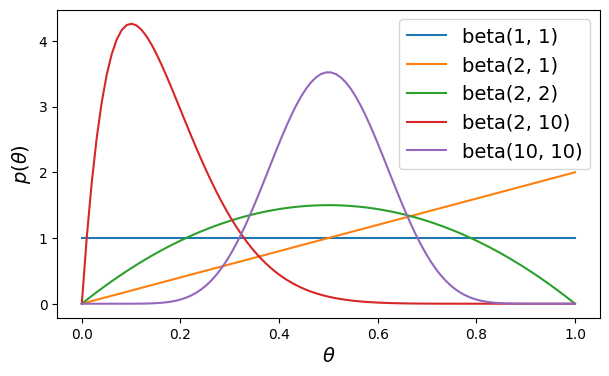

In [1]:
#  График плотностей бета-распределений
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 4))
x = np.linspace(0, 1, 100)
plt.plot(x, stats.beta.pdf(x, 1, 1), label='beta(1, 1)')
plt.plot(x, stats.beta.pdf(x, 2, 1), label='beta(2, 1)')
plt.plot(x, stats.beta.pdf(x, 2, 2), label='beta(2, 2)')
plt.plot(x, stats.beta.pdf(x, 2, 10), label='beta(2, 10)')
plt.plot(x, stats.beta.pdf(x, 10, 10), label='beta(10, 10)')
plt.legend(fontsize=14)
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$p(\theta)$', fontsize=14)
plt.show()

Примените алгоритм Metropolis для генерации выборки из распределения с плотностью p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси

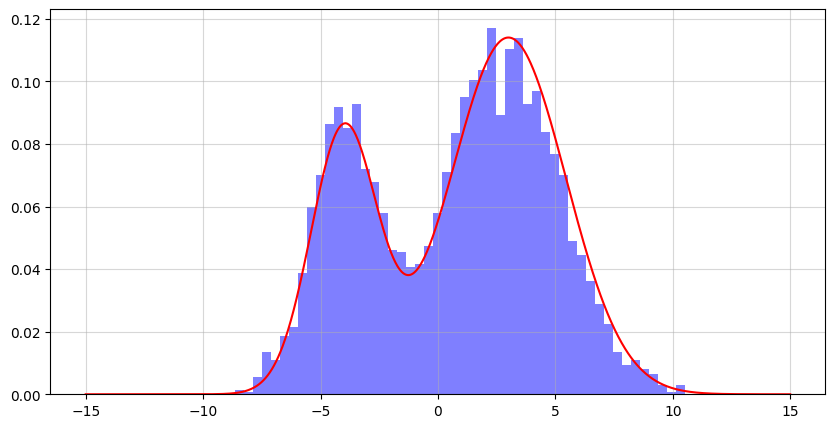

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def value(x):
    return 0.3 * norm.pdf(x, loc=-4, scale=np.sqrt(2)) + 0.7 * norm.pdf(x, loc=3, scale=np.sqrt(6))

def proposal(current, sigma, **kwargs):
    return current + sigma * np.random.randn()

def metropolis(start, value, proposal, niter, nburn=0, **kwargs):
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = min(1, value(proposed) / value(current))
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

sigma_val = 2
n_iter = 10000
n_burn = 100
samples = metropolis(start=-4, value=value, proposal=proposal, niter=n_iter, nburn=n_burn, sigma=sigma_val)

x = np.linspace(-15, 15, 1000)
y = value(x)

plt.figure(figsize=(10, 5))
plt.hist(samples, bins=50, density=True, alpha=0.5, color='blue')
plt.plot(x, y, c='red')
plt.grid(True, alpha=0.5)
plt.show()

Задание
Оценить  En(ξ)  для графа 10х10
Построить график распределеиня  n(ξ)

Оценка E[n(ξ)] = 24.19


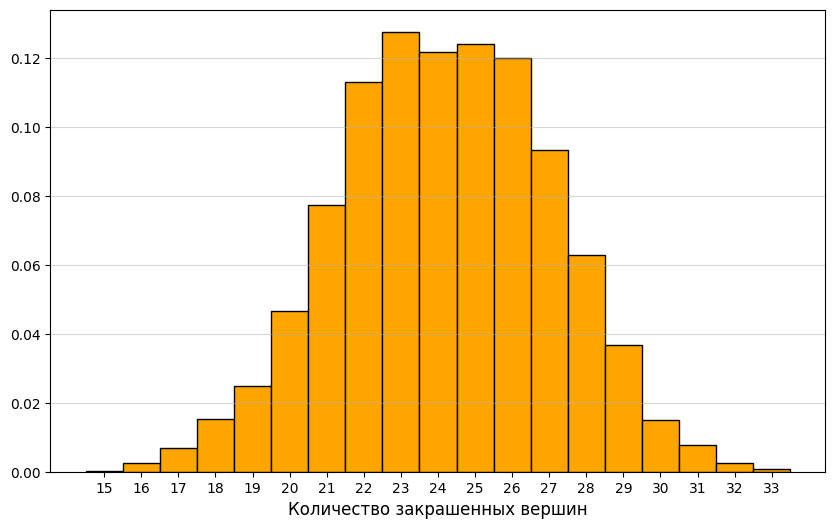

In [3]:


import numpy as np
import matplotlib.pyplot as plt

def is_valid(grid):
    rows, cols = grid.shape
    for i in range(rows):
        for j in range(cols):
            if grid[i, j] == 1:
                if j + 1 < cols and grid[i, j + 1] == 1:
                    return False
                if i + 1 < rows and grid[i + 1, j] == 1:
                    return False
    return True

def value(x):
    return 1 if is_valid(x) else 0

def proposal(current, **kwargs):
    new_grid = current.copy()
    size = new_grid.shape[0]
    i, j = np.random.randint(0, size, 2)
    new_grid[i, j] = 1 - new_grid[i, j]
    return new_grid

def metropolis(start, value, proposal, niter, nburn=0, **kwargs):
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        if value(current) == 0:
            p = 1.0
        else:
            p = value(proposed)
        if np.random.rand() < p:
            current = proposed
        post.append(current.copy())
    return post[nburn:]

size = 10
n_iter = 10000
n_burn = 1000
grid_start = np.zeros((size, size), dtype=int)

samples = metropolis(start=grid_start, value=value, proposal=proposal, niter=n_iter, nburn=n_burn)
counts = np.array([np.sum(i) for i in samples])
mean_n = np.mean(counts)

print(f"Оценка E[n(ξ)] = {mean_n:.2f}")

plt.figure(figsize=(10, 6))
bins = np.arange(counts.min(), counts.max() + 2) - 0.5
plt.hist(counts, bins=bins, density=True, color='orange', edgecolor='black')
plt.xticks(np.arange(counts.min(), counts.max() + 1))
plt.xlabel('Количество закрашенных вершин', fontsize=12)
plt.grid(axis='y', alpha=0.5)
plt.show()